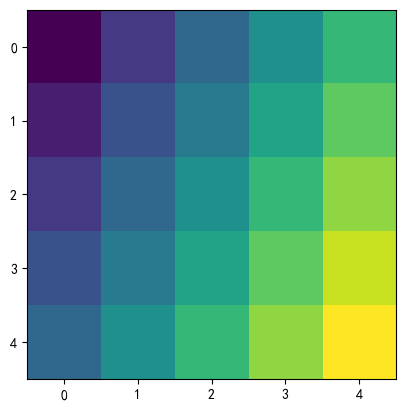

In [9]:
import numpy as np
import matplotlib.pyplot as plt

mini_image = np.array([
    [10, 20, 30, 40, 50],
    [15, 25, 35, 45, 55],
    [20, 30, 40, 50, 60],
    [25, 35, 45, 55, 65],
    [30, 40, 50, 60, 70]
])
plt.imshow(mini_image)

##### 1.请找出mini_image的中心像素位置，并打印其对角邻域的像素值

In [10]:
# 1. 获取中心像素位置和值
center_row, center_col = 2, 2
center_value = mini_image[center_row, center_col]

# 2. 获取对角邻域像素值
top_left = mini_image[center_row-1, center_col-1]  # 左上 (1,1)
top_right = mini_image[center_row-1, center_col+1] # 右上 (1,3)
bottom_left = mini_image[center_row+1, center_col-1] # 左下 (3,1)
bottom_right = mini_image[center_row+1, center_col+1] # 右下 (3,3)

# 打印结果
print("中心像素位置：[2, 2]，值 =", center_value)
print("对角邻域像素值：")
print(f"左上 (1,1): {top_left}, 右上 (1,3): {top_right}")
print(f"左下 (3,1): {bottom_left}, 右下 (3,3): {bottom_right}")

中心像素位置：[2, 2]，值 = 40
对角邻域像素值：
左上 (1,1): 25, 右上 (1,3): 45
左下 (3,1): 35, 右下 (3,3): 55


##### 2. 读取低对比度图fig_low_contrast.tif，按照对比度拉伸公式I_out = (I_in - min) * (255 / (max - min))调整其对比度，观察其变换前后的像素直方图以及调整效果

原始图像灰度范围：[91, 138]
拉伸后图像灰度范围：[0, 255]


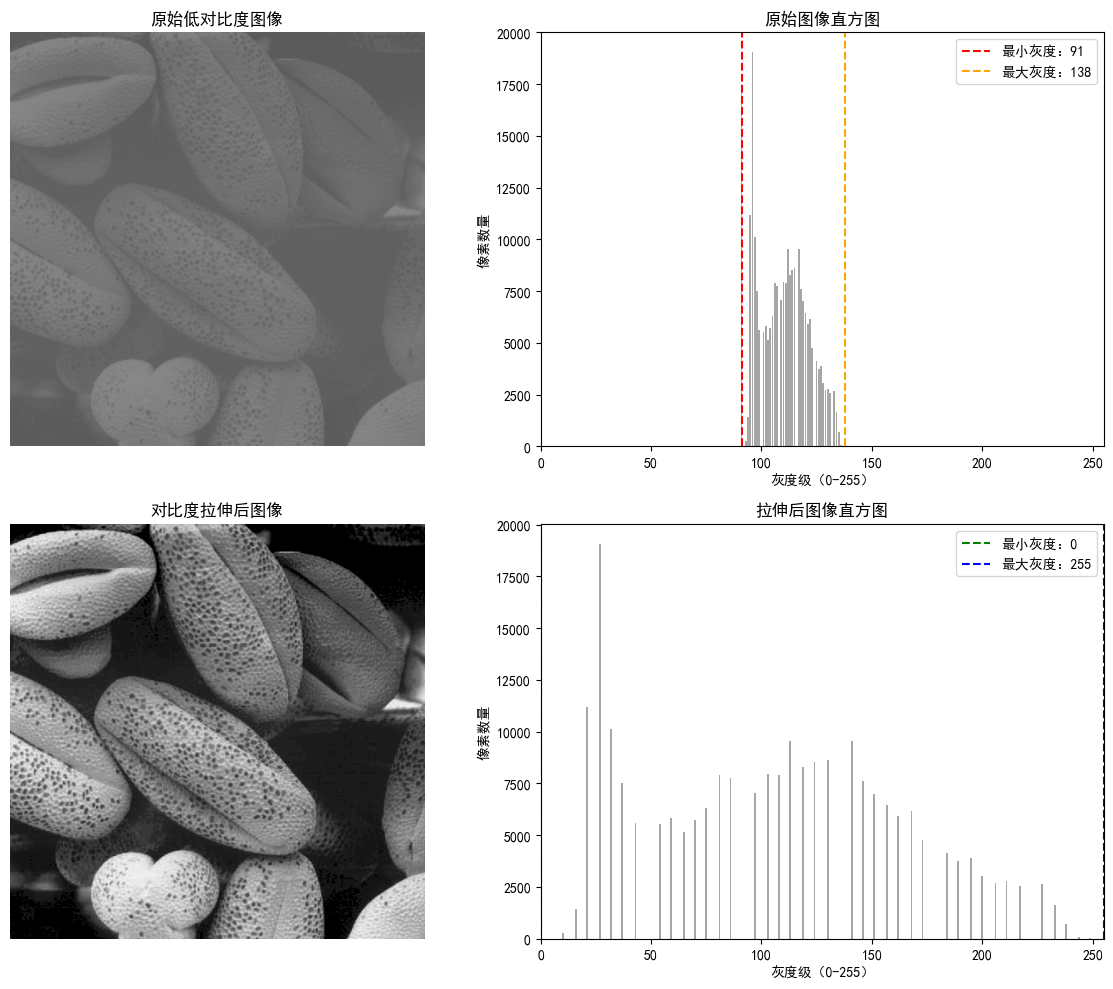

In [11]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# ---------------------- 步骤1：读取低对比度图像 ----------------------
# 注意：OpenCV默认读取为BGR格式，灰度图需指定cv2.IMREAD_GRAYSCALE
img_path = "F:/Source-code-management-repository/MyHome/Machine vision/Data/fig_low_contrast.tif"  # 替换为你的图像路径
img_gray = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

# 检查图像是否成功读取
if img_gray is None:
    raise FileNotFoundError(f"未找到图像文件：{img_path}，请检查路径是否正确")

# ---------------------- 步骤2：计算原始图像的min/max灰度值 ----------------------
I_min = np.min(img_gray)  # 原始图像最小灰度
I_max = np.max(img_gray)  # 原始图像最大灰度
print(f"原始图像灰度范围：[{I_min}, {I_max}]")  # 低对比度图通常范围狭窄（如[50, 150]）

# ---------------------- 步骤3：应用对比度拉伸公式 ----------------------
# 避免分母为0（极端情况：图像全白/全黑）
if I_max - I_min == 0:
    img_stretched = img_gray  # 无需拉伸
else:
    # 公式计算（注意数据类型转换：避免溢出，先转float再转uint8）
    img_stretched = (img_gray - I_min) * (255.0 / (I_max - I_min))
    img_stretched = np.uint8(img_stretched)  # 转回8位灰度图

# 验证拉伸后灰度范围
print(f"拉伸后图像灰度范围：[{np.min(img_stretched)}, {np.max(img_stretched)}]")  # 应输出[0,255]

# ---------------------- 步骤4：计算图像直方图 ----------------------
def calculate_histogram(image):
    """计算灰度图像的直方图（0-255灰度级）"""
    hist = np.zeros(256, dtype=int)
    for pixel in image.flatten():  # 遍历所有像素
        hist[pixel] += 1
    return hist

# 计算原始图和拉伸图的直方图
hist_original = calculate_histogram(img_gray)
hist_stretched = calculate_histogram(img_stretched)

# ---------------------- 步骤5：绘制「图像+直方图」对比图 ----------------------
plt.rcParams['font.sans-serif'] = ['SimHei']  # 解决中文显示问题
fig, axes = plt.subplots(2, 2, figsize=(12, 10))  # 2行2列布局

# 1. 原始灰度图
axes[0, 0].imshow(img_gray, cmap='gray', vmin=0, vmax=255)
axes[0, 0].set_title('原始低对比度图像', fontsize=12)
axes[0, 0].axis('off')  # 隐藏坐标轴

# 2. 原始图直方图
axes[0, 1].bar(range(256), hist_original, color='gray', alpha=0.7)
axes[0, 1].set_title('原始图像直方图', fontsize=12)
axes[0, 1].set_xlabel('灰度级（0-255）')
axes[0, 1].set_ylabel('像素数量')
axes[0, 1].set_xlim(0, 255)
# 标注原始图的min/max灰度
axes[0, 1].axvline(x=I_min, color='red', linestyle='--', label=f'最小灰度：{I_min}')
axes[0, 1].axvline(x=I_max, color='orange', linestyle='--', label=f'最大灰度：{I_max}')
axes[0, 1].legend()

# 3. 拉伸后灰度图
axes[1, 0].imshow(img_stretched, cmap='gray', vmin=0, vmax=255)
axes[1, 0].set_title('对比度拉伸后图像', fontsize=12)
axes[1, 0].axis('off')

# 4. 拉伸图直方图
axes[1, 1].bar(range(256), hist_stretched, color='gray', alpha=0.7)
axes[1, 1].set_title('拉伸后图像直方图', fontsize=12)
axes[1, 1].set_xlabel('灰度级（0-255）')
axes[1, 1].set_ylabel('像素数量')
axes[1, 1].set_xlim(0, 255)
# 标注拉伸后的min/max灰度（固定为0和255）
axes[1, 1].axvline(x=0, color='green', linestyle='--', label='最小灰度：0')
axes[1, 1].axvline(x=255, color='blue', linestyle='--', label='最大灰度：255')
axes[1, 1].legend()

# 调整子图间距
plt.tight_layout()
# 保存或显示图像
plt.savefig('contrast_stretch_result.png', dpi=300, bbox_inches='tight')
plt.show()

##### 3.读取fig_noise.tif噪声图，使用均值滤波和高斯滤波平滑噪声，并分析这两种方法的效果差异（注：如果不使用opencv函数，大家能不能实现）

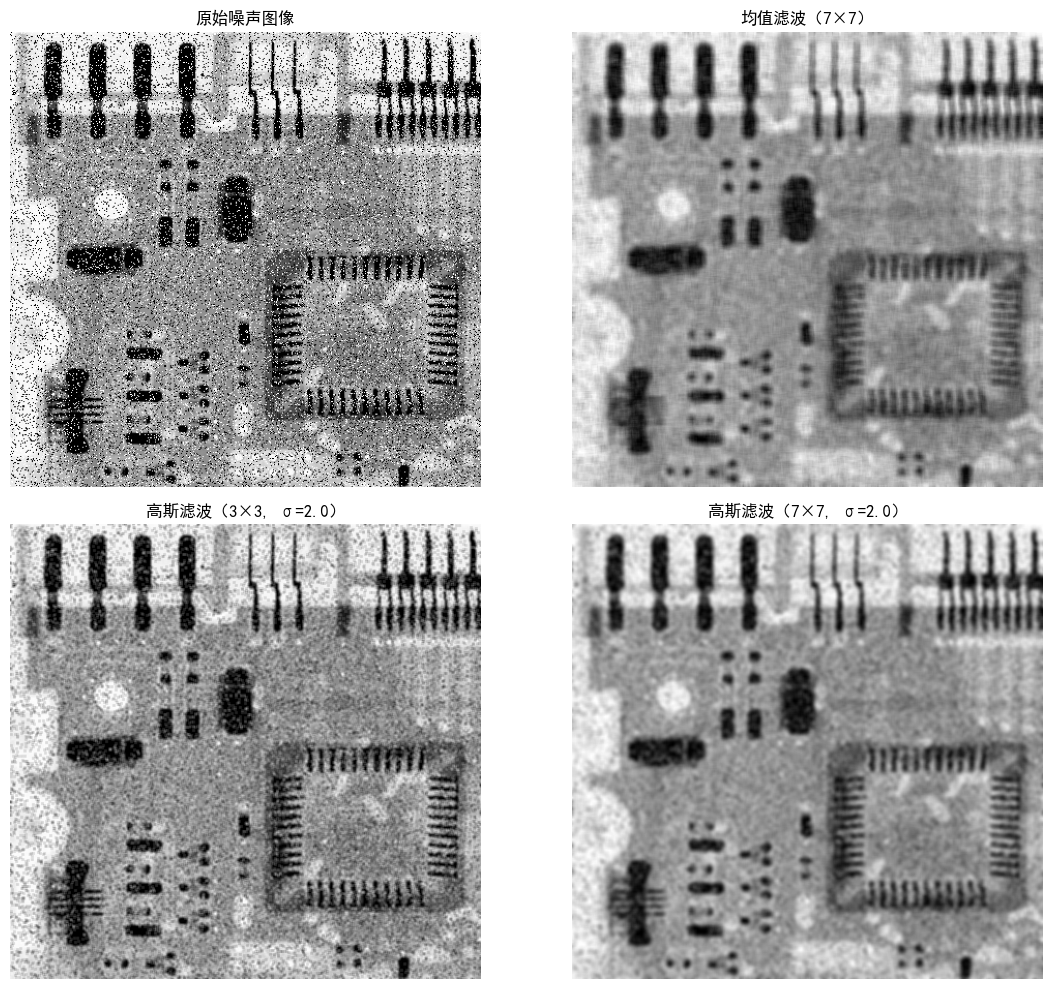

In [12]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# ---------------------- 步骤1：读取噪声图像 ----------------------
img_path = "F:/Source-code-management-repository/MyHome/Machine vision/Data/fig_noise.tif"  # 替换为你的图像路径
img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)  # 读取为灰度图
if img is None:
    raise FileNotFoundError(f"未找到图像：{img_path}，请检查路径")

# ---------------------- 步骤2：手动实现均值滤波 ----------------------
def mean_filter(image, kernel_size=3):
    """
    均值滤波：窗口内所有像素取平均
    kernel_size：滤波窗口大小（奇数，如3、5）
    """
    h, w = image.shape
    pad = kernel_size // 2  # 边界填充大小
    padded = np.pad(image, pad_width=pad, mode='edge')  # 边缘填充
    result = np.zeros_like(image, dtype=np.uint8)
    
    # 滑动窗口遍历
    for i in range(h):
        for j in range(w):
            window = padded[i:i+kernel_size, j:j+kernel_size]
            result[i, j] = np.mean(window).astype(np.uint8)
    return result

# ---------------------- 步骤3：手动实现高斯滤波 ----------------------
def gaussian_kernel(kernel_size, sigma):
    """生成高斯卷积核"""
    kernel = np.zeros((kernel_size, kernel_size), dtype=np.float32)
    center = kernel_size // 2
    for x in range(kernel_size):
        for y in range(kernel_size):
            dx = x - center
            dy = y - center
            kernel[x, y] = np.exp(-(dx**2 + dy**2) / (2 * sigma**2))
    kernel /= np.sum(kernel)  # 归一化
    return kernel

def gaussian_filter(image, kernel_size=3, sigma=1.0):
    """高斯滤波：用高斯核卷积图像"""
    h, w = image.shape
    pad = kernel_size // 2
    padded = np.pad(image, pad_width=pad, mode='edge')
    kernel = gaussian_kernel(kernel_size, sigma)
    result = np.zeros_like(image, dtype=np.uint8)
    
    for i in range(h):
        for j in range(w):
            window = padded[i:i+kernel_size, j:j+kernel_size]
            result[i, j] = np.sum(window * kernel).astype(np.uint8)
    return result

# ---------------------- 步骤4：执行滤波（调整参数） ----------------------
# 均值滤波（增大核尺寸到7×7）
mean_7x7 = mean_filter(img, kernel_size=7)
# 高斯滤波（增大标准差到2.0，保持3×3窗口）
gaussian_3x3_s2 = gaussian_filter(img, kernel_size=3, sigma=2.0)

# 均值滤波（3×3窗口）
mean_3x3 = mean_filter(img, kernel_size=3)


# 可选：增加一组高斯滤波（7×7窗口+σ=2.0）用于对比
gaussian_7x7_s2 = gaussian_filter(img, kernel_size=7, sigma=2.0)

# ---------------------- 步骤5：效果对比与可视化 ----------------------
plt.rcParams['font.sans-serif'] = ['SimHei']  # 中文显示
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# 原始噪声图
axes[0,0].imshow(img, cmap='gray')
axes[0,0].set_title('原始噪声图像')
axes[0,0].axis('off')

# 均值滤波（7×7）结果
axes[0,1].imshow(mean_7x7, cmap='gray')
axes[0,1].set_title('均值滤波（7×7）')
axes[0,1].axis('off')

# # 均值滤波（3×3）结果
# axes[0,1].imshow(mean_3x3, cmap='gray')
# axes[0,1].set_title('均值滤波（3×3）')
# axes[0,1].axis('off')

# 高斯滤波（3×3, σ=2.0）结果
axes[1,0].imshow(gaussian_3x3_s2, cmap='gray')
axes[1,0].set_title('高斯滤波（3×3, σ=2.0）')
axes[1,0].axis('off')

# 高斯滤波（7×7, σ=2.0）结果
axes[1,1].imshow(gaussian_7x7_s2, cmap='gray')
axes[1,1].set_title('高斯滤波（7×7, σ=2.0）')
axes[1,1].axis('off')

plt.tight_layout()
plt.savefig('noise_filter_larger_params.png', dpi=300)
plt.show()